In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CarlosSanchez03/Fisica-computacional1/main/Actividad1/diario%20durango.txt'
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
df_work0 = df_dist.copy()
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')
df_work2 = df_work1.copy()
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15527 entries, 0 to 15526
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   15527 non-null  datetime64[ns]
 1   Precip  15464 non-null  float64       
 2   Evap    13129 non-null  float64       
 3   Tmax    15260 non-null  float64       
 4   Tmin    15260 non-null  float64       
 5   Año     15527 non-null  int64         
 6   Mes     15527 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 849.3 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1941-01-01     0.0   3.3  19.5   3.5  1941    1
1 1941-01-02     0.0   3.8  21.5   2.5  1941    1
2 1941-01-03     0.0   5.8  23.5   5.5  1941    1
3 1941-01-04     0.0   5.7  19.0   7.5  1941    1
4 1941-01-05     0.0   5.0  21.5  -4.5  1941    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
15522 2000-12-27     0.4   3.6  12.5   8.0  2000   12
15523 2000-12-28 

In [3]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15527 entries, 0 to 15526
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   15527 non-null  datetime64[ns]
 1   Precip  15464 non-null  float64       
 2   Evap    13129 non-null  float64       
 3   Tmax    15260 non-null  float64       
 4   Tmin    15260 non-null  float64       
 5   Año     15527 non-null  int64         
 6   Mes     15527 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 849.3+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1941-01-01     0.0   3.3  19.5   3.5  1941  Jan
1 1941-01-02     0.0   3.8  21.5   2.5  1941  Jan
2 1941-01-03     0.0   5.8  23.5   5.5  1941  Jan
3 1941-01-04     0.0   5.7  19.0   7.5  1941  Jan
4 1941-01-05     0.0   5.0  21.5  -4.5  1941  Jan


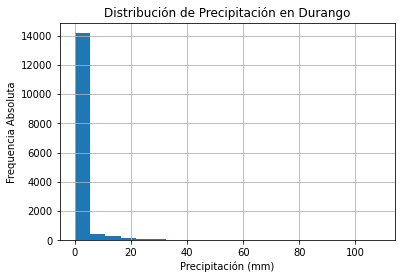

In [5]:
plt.hist(df_meteo.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Durango')
plt.grid()
plt.show()

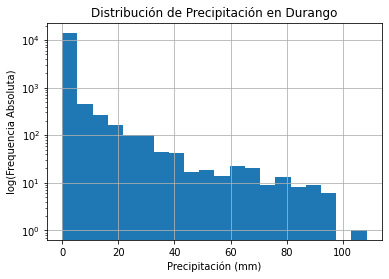

In [6]:
plt.hist(df_meteo.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Durango')
plt.grid()
plt.show()


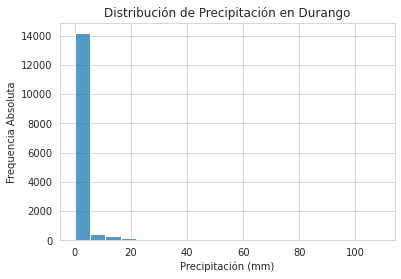

In [7]:
# Misma gráfica utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Durango')
sns.histplot(data=df_meteo, x='Precip', bins=20);

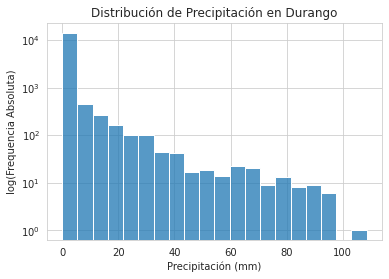

In [8]:
# Repetimos la gráfica utilizando escala logarítmica sólo en el eje y
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Durango')
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

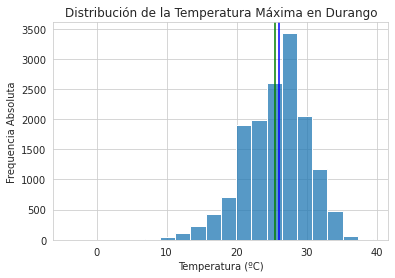

In [12]:
#Actividad  4.2
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Durango')

plt.show()

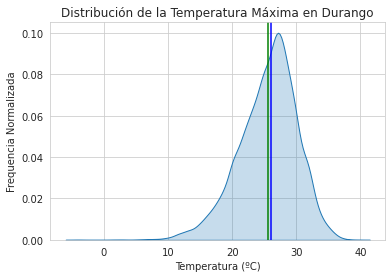

In [13]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmax, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Durango')

plt.show()

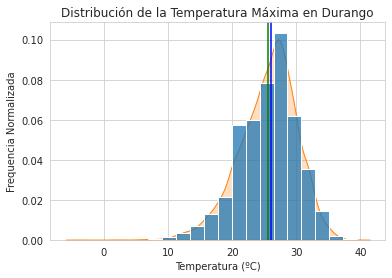

In [14]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmax, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Durango')

plt.show()

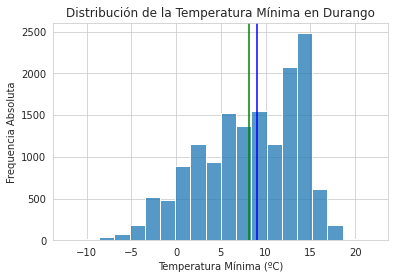

In [16]:
# Gráfica de la Temperatura Mínima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Durango')

plt.show()

In [17]:
print(Tmed)
print(Tprom)

9.0
8.156618610747046


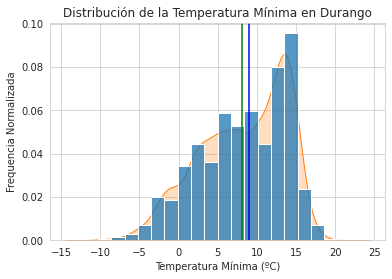

In [19]:
# Gráfica de la Temperatura Mínima y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Durango')

plt.show()

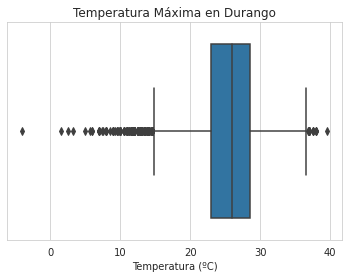

In [21]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Durango');

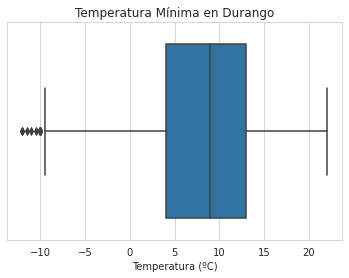

In [22]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Durango');

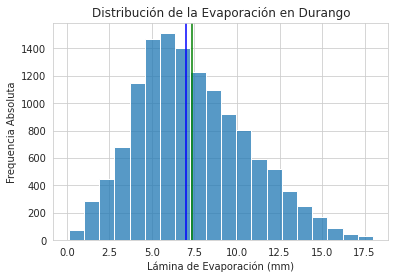

In [24]:
# Gráfica de la Evaporación
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Ev_med = df_meteo.Evap.median() 
Ev_prom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Ev_med, color = 'b', label = 'm') 
plt.axvline(x = Ev_prom, color = 'g', label = 'x')

plt.xlabel('Lámina de Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en Durango')

plt.show()

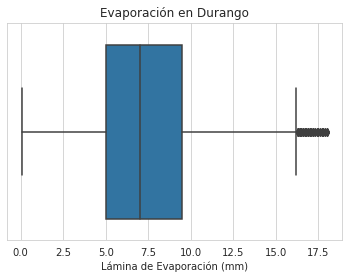

In [25]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Lámina de Evaporación (mm)', 
                                                     title='Evaporación en Durango');

In [33]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2010)]

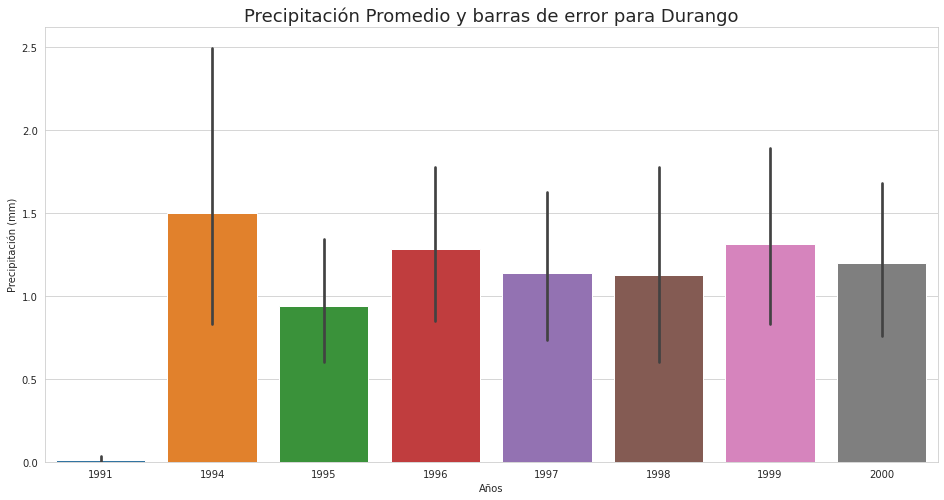

In [34]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Durango', fontsize=18)

plt.show()

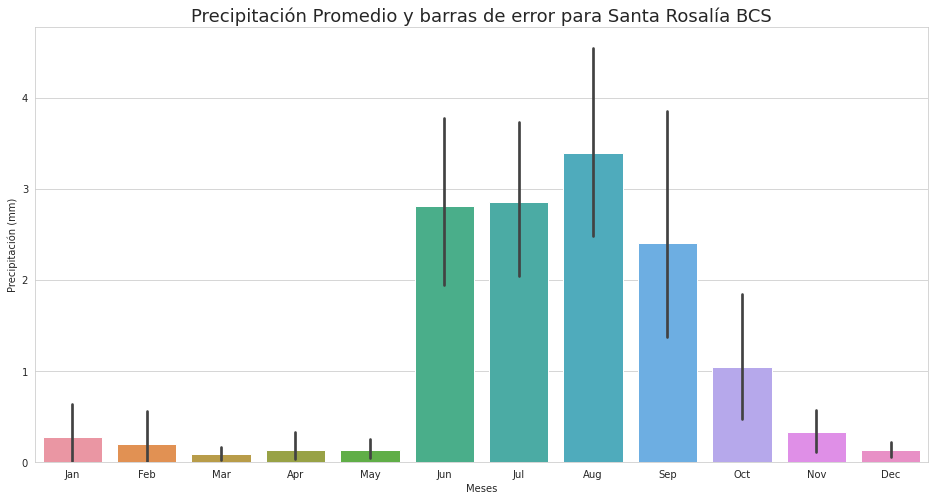

In [36]:
 #Gráfica de Precipitación últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Santa Rosalía BCS', fontsize=18)

plt.show()

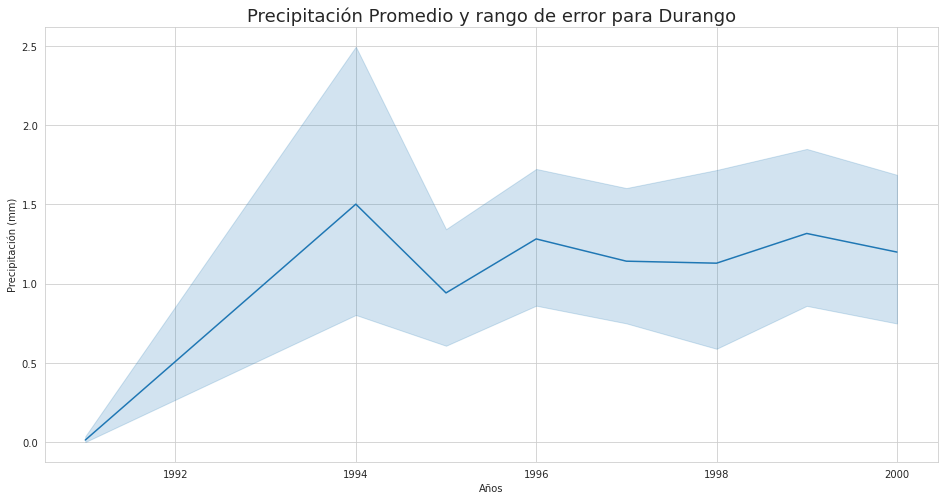

In [38]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Durango', fontsize=18)

plt.show()

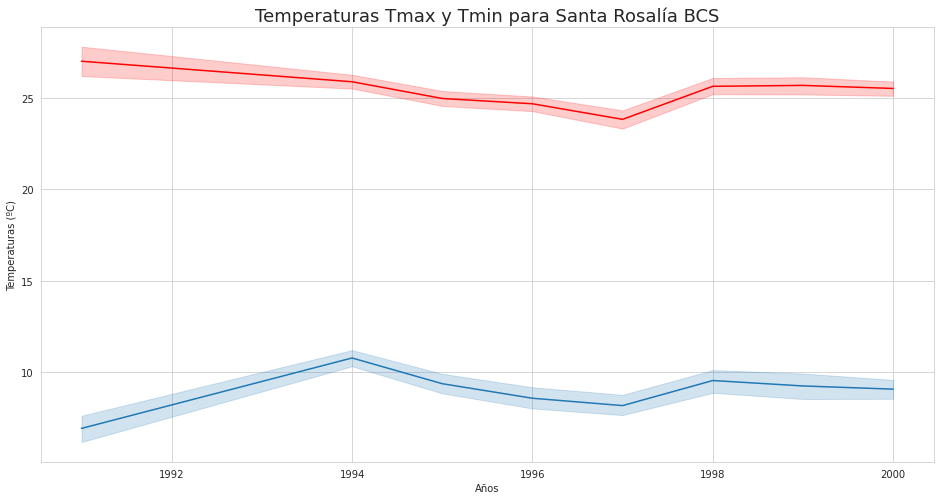

In [40]:
 #Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Santa Rosalía BCS', fontsize=18)

plt.show()

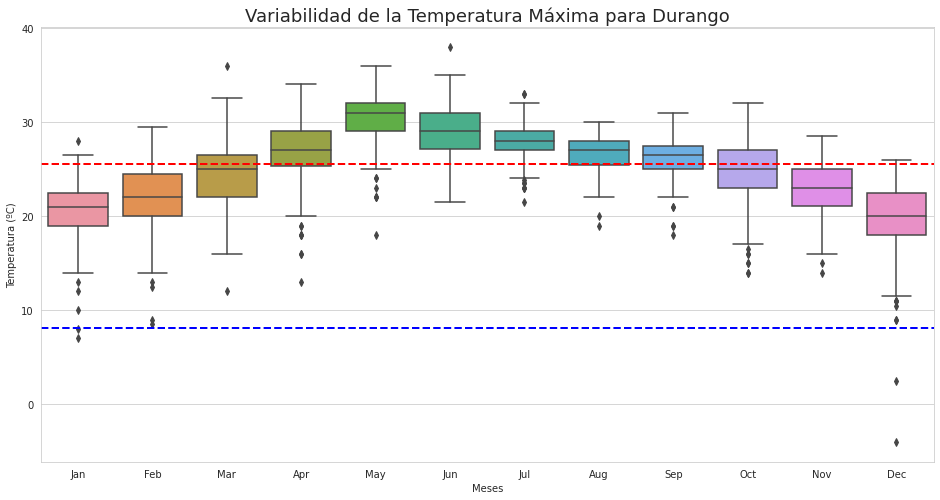

mean(Tmax) =  25.51384010484931
mean(Tmin) =  8.156618610747046
Diff Tmax_ave-Tmin_ave =  17.357221494102266


In [42]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Durango', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

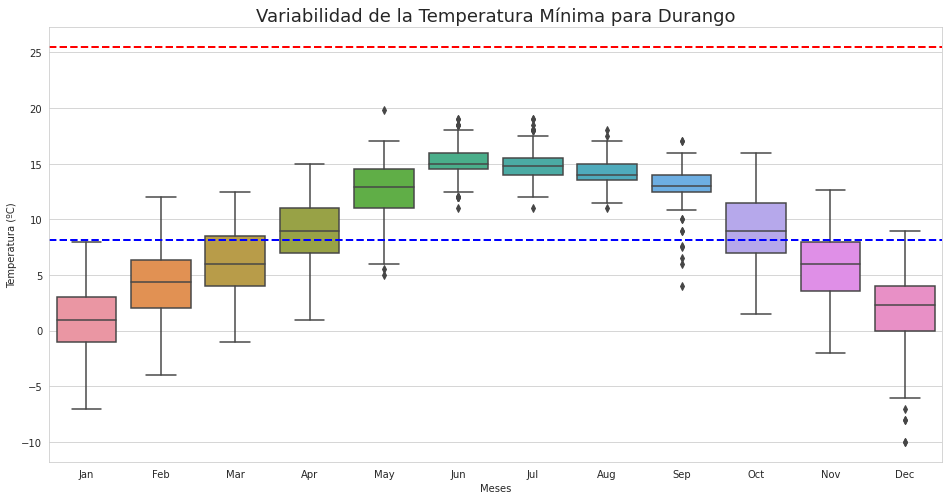

mean(Tmax) =  25.51384010484931
mean(Tmin) =  8.156618610747046
Diff Tmax_ave-Tmin_ave =  17.357221494102266


In [43]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Durango', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

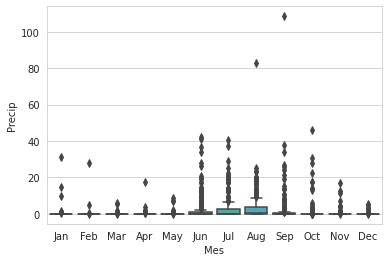

In [44]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90);